In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Loading Dataset

In [ ]:
df = pd.read_csv('Iphone_purchase.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Applying Label Encoder for Gender column

In [ ]:
encoder=preprocessing.LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64

Calculate Correlation between every Feature and the Output

In [ ]:
for i in df.columns:
    print(i," = ",df[i].corr(df['Purchased']))

User ID  =  0.007120180635720808
Gender  =  -0.042469456264509216
Age  =  0.622454198884529
EstimatedSalary  =  0.36208302580467927
Purchased  =  1.0


Drop unimportant Features

In [ ]:
df.drop(['User ID' , 'Gender'],axis=1,inplace=True)

Correlation Matrix

<Axes: >

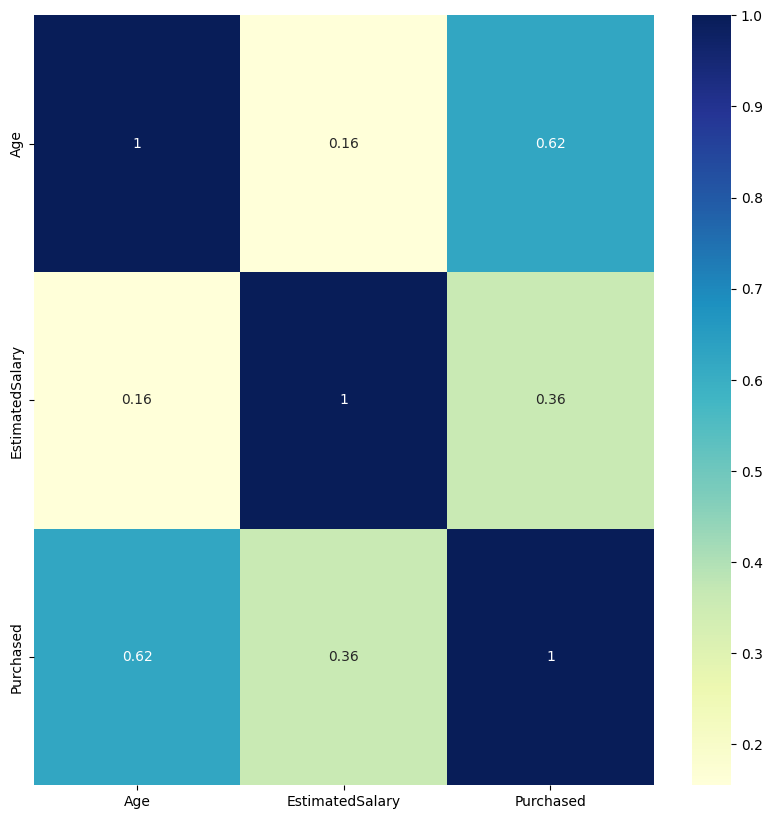

In [ ]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(), annot=True,cmap='YlGnBu')

Split into input Features and Output Labels

In [ ]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


Split into Training and Testing

In [ ]:
col=X.columns
object = StandardScaler()
X = object.fit_transform(X)
X=pd.DataFrame(X,columns=col)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Fill Nan values with the mean value of the column

In [ ]:
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_test)

Trying different Hyperparameter K and choosing K which gives the best accuracy

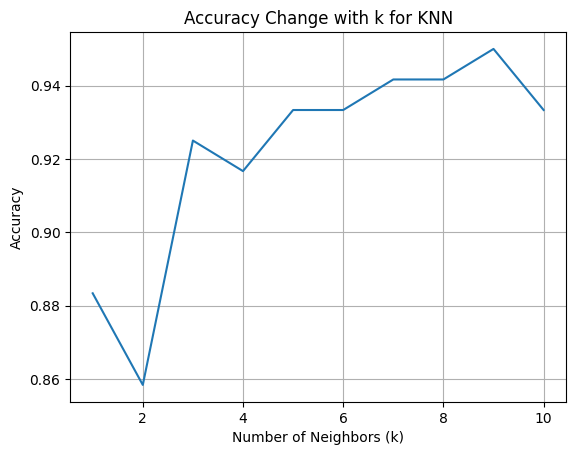

In [ ]:

# Define hyperparameters and evaluation metric
hyperparameter_grid = {'n_neighbors': range(1, 11)}  # Explore k from 1 to 10
evaluation_metric = 'accuracy'
# Create an empty list to store evaluation metrics (accuracy for each k)
k_values = []
accuracy_scores = []

# Loop through k values in hyperparameter grid
for k in hyperparameter_grid['n_neighbors']:
    # Create a KNN model with current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(x_train, y_train)

    # Make predictions on testing set
    y_pred = knn.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append k and accuracy to respective lists
    k_values.append(k)
    accuracy_scores.append(accuracy)

# Create the line chart
plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy Change with k for KNN')
plt.grid(True)
plt.show()

train KNN with the best K chosen

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn = knn.fit(x_train,y_train)

Training Accuracy

In [ ]:
y_pred =knn.predict(x_test)
knn.score(x_train, y_train)

0.8964285714285715

Testing Accuracy

In [ ]:
print(accuracy_score( y_test, y_pred))

0.95


Output predicted Labels

In [ ]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0])

Confusion Matrix to get True Positives, True Negatives, False Positives and False Negatives

<Axes: >

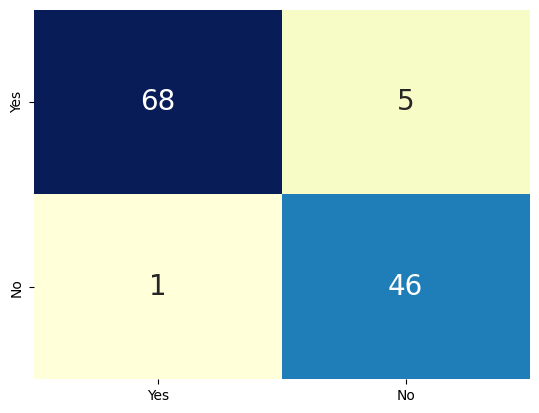

In [ ]:
cr=confusion_matrix(y_test, y_pred)
cr=pd.DataFrame(cr)
cr.columns = ['Yes', 'No']
cr.index=['Yes', 'No']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

Changing the hyperparameter var_smoothing and choosing the values which gives the highest accuracy

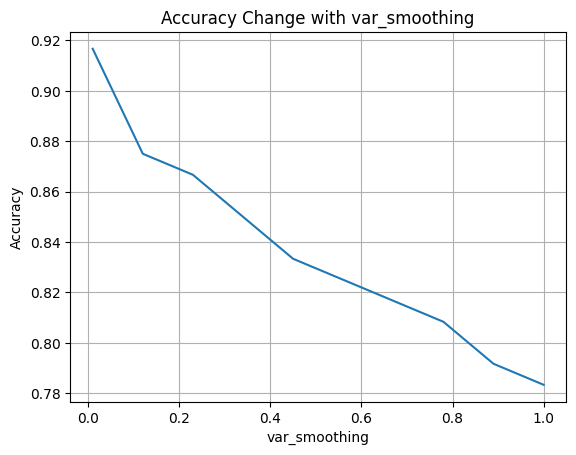

In [ ]:


# Define a range of var_smoothing values to explore
var_smoothing_values = np.linspace(0.01, 1.0, num=10)  # Adjust the range as needed

# Create an empty list to store accuracy values
accuracy_scores = []

# Iterate through var_smoothing values
for smoothing in var_smoothing_values:
    # Create a Gaussian Naive Bayes model with current smoothing parameter
    model = GaussianNB(var_smoothing=smoothing)

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on testing set
    y_pred = model.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy to the list
    accuracy_scores.append(accuracy)

# Create the line chart
plt.plot(var_smoothing_values, accuracy_scores)
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.title('Accuracy Change with var_smoothing')
plt.grid(True)
plt.show()

Training Model with best value for var_smoothing

In [ ]:
model = GaussianNB(var_smoothing=0)
model.fit(x_train, y_train)

GaussianNB(var_smoothing=0)

Training Accuracy

In [ ]:
y_pred = model.predict(x_test)
model.score(x_train,y_train)

0.8571428571428571

Testing Accuracy

In [ ]:
print(accuracy_score(y_test, y_pred))

0.925


Output Predicted Labels

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

Confusion Matrix to get True Positives, True Negatives, False Positives and False Negatives

<Axes: >

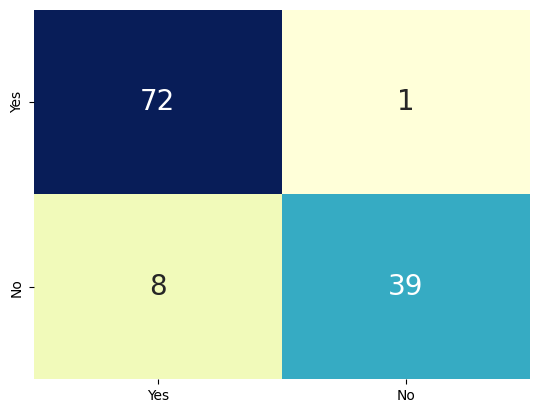

In [ ]:
cr=confusion_matrix(y_test, y_pred)
cr=pd.DataFrame(cr)
cr.columns = ['Yes', 'No']
cr.index=['Yes', 'No']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

MLP Classifier


In [ ]:
activation_functions = ['identity', 'logistic', 'tanh']
accuracy_scores_identity = []
accuracy_scores_logistic = []
accuracy_scores_tanh = []

activation_functions = ['identity', 'logistic', 'tanh']

for k in activation_functions:
    for i in range(1, 100, 3):
        for l in np.arange(0.1, 1, 0.1):
            model = MLPClassifier(hidden_layer_sizes=i,
                                  activation=k,
                                  solver='sgd',  # Use SGD
                                  learning_rate='constant',
                                  learning_rate_init=l,
                                  max_iter=200)
            model.fit(x_train, y_train)

            # Make predictions on testing set
            y_pred = model.predict(x_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Append accuracy to the corresponding list based on activation function
            if k == 'identity':
                accuracy_scores_identity.append((accuracy, i, l))
            elif k == 'logistic':
                accuracy_scores_logistic.append((accuracy, i, l))
            elif k == 'tanh':
                accuracy_scores_tanh.append((accuracy, i, l))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

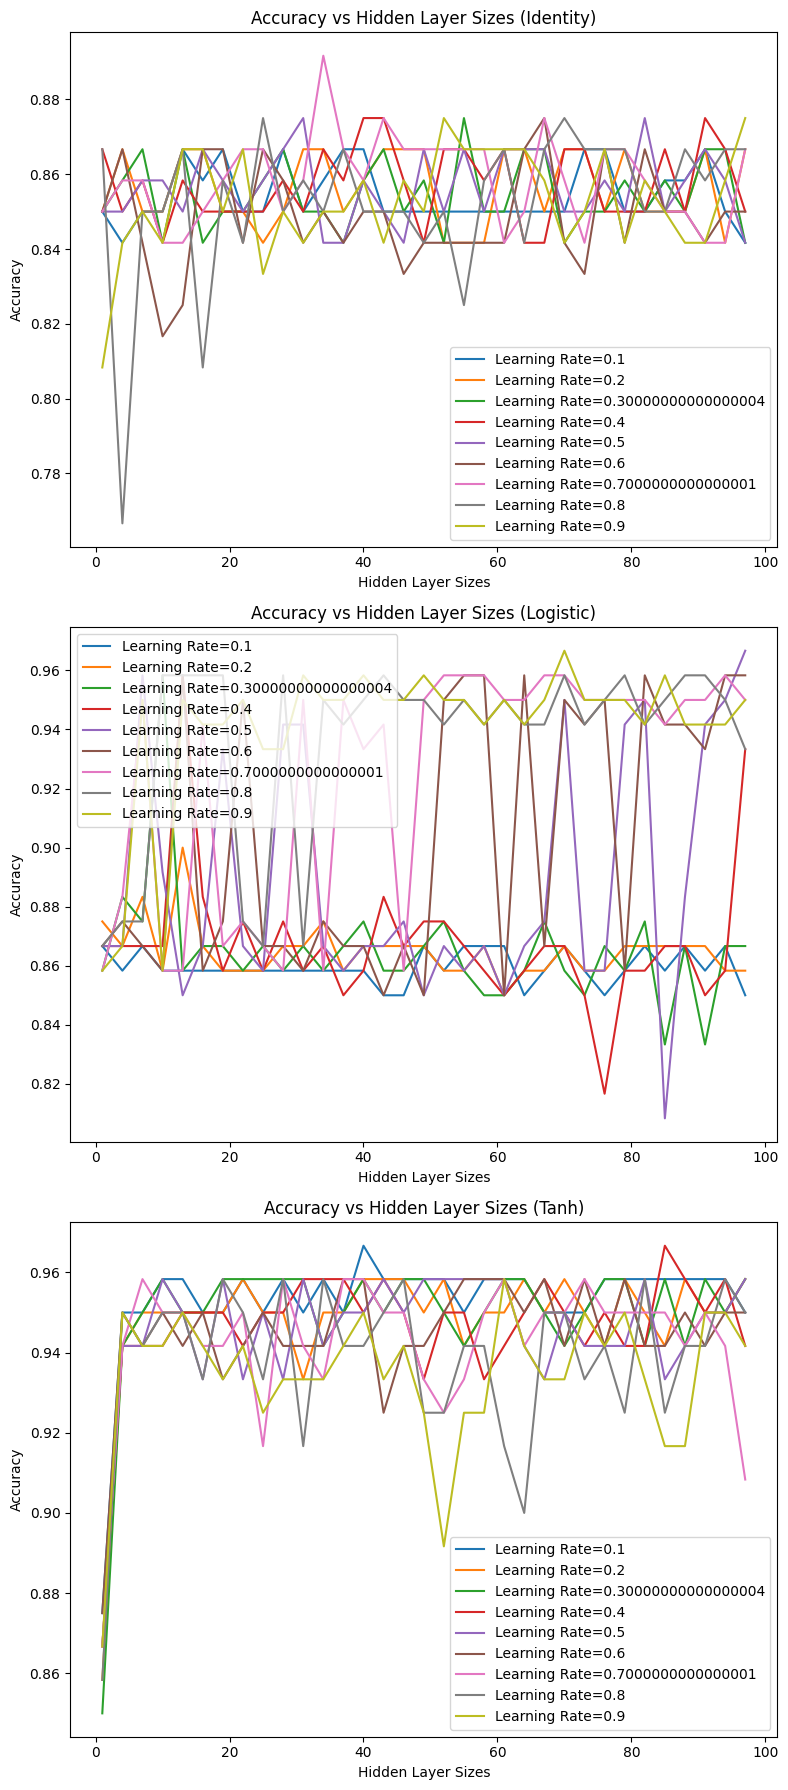

In [ ]:
plt.figure(figsize=(8, 18))

# Plot for identity activation function
plt.subplot(3, 1, 1)
for l in np.arange(0.1, 1, 0.1):
    accuracies = [acc[0] for acc in accuracy_scores_identity if acc[2] == l]
    hidden_sizes = [acc[1] for acc in accuracy_scores_identity if acc[2] == l]
    plt.plot(hidden_sizes, accuracies, label=f'Learning Rate={l}')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Hidden Layer Sizes (Identity)')
plt.legend()

# Plot for logistic activation function
plt.subplot(3, 1, 2)
for l in np.arange(0.1, 1, 0.1):
    accuracies = [acc[0] for acc in accuracy_scores_logistic if acc[2] == l]
    hidden_sizes = [acc[1] for acc in accuracy_scores_logistic if acc[2] == l]
    plt.plot(hidden_sizes, accuracies, label=f'Learning Rate={l}')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Hidden Layer Sizes (Logistic)')
plt.legend()

# Plot for tanh activation function
plt.subplot(3, 1, 3)
for l in np.arange(0.1, 1, 0.1):
    accuracies = [acc[0] for acc in accuracy_scores_tanh if acc[2] == l]
    hidden_sizes = [acc[1] for acc in accuracy_scores_tanh if acc[2] == l]
    plt.plot(hidden_sizes, accuracies, label=f'Learning Rate={l}')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Hidden Layer Sizes (Tanh)')
plt.legend()

plt.tight_layout()
plt.show()

(0.9666666666666667, 85, 0.4)
(0.8916666666666667, 34, 0.7000000000000001)
(0.9666666666666667, 97, 0.5)


<Axes: >

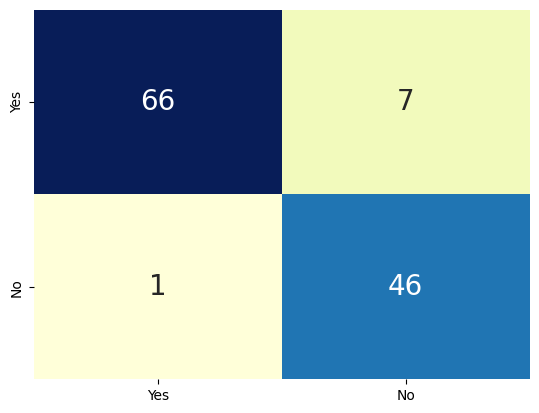

In [ ]:
print (max(accuracy_scores_tanh))
print (max(accuracy_scores_identity))
print (max(accuracy_scores_logistic))
model = MLPClassifier(hidden_layer_sizes=max(accuracy_scores_tanh)[1],
                                  activation='tanh',
                                  solver='sgd',  # Use SGD
                                  learning_rate='constant',
                                  learning_rate_init=max(accuracy_scores_tanh)[2],
                                  max_iter=200)
model.fit(x_train, y_train)

            # Make predictions on testing set
y_pred = model.predict(x_test)
cr=confusion_matrix(y_test, y_pred)
cr=pd.DataFrame(cr)
cr.columns = ['Yes', 'No']
cr.index=['Yes', 'No']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

In [ ]:
print(y_pred)

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0
 0 1 1 1 0 0 1 0 0]


<Axes: >

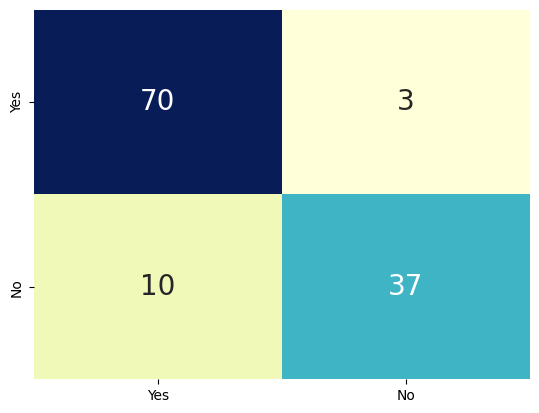

In [ ]:
model = MLPClassifier(hidden_layer_sizes=max(accuracy_scores_logistic)[1],
                                  activation='logistic',
                                  solver='sgd',  # Use SGD
                                  learning_rate='constant',
                                  learning_rate_init=max(accuracy_scores_logistic)[2],
                                  max_iter=200)
model.fit(x_train, y_train)

            # Make predictions on testing set
y_pred = model.predict(x_test)

cr=confusion_matrix(y_test, y_pred)
cr=pd.DataFrame(cr)
cr.columns = ['Yes', 'No']
cr.index=['Yes', 'No']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

In [ ]:
print(y_pred)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0
 0 1 1 1 0 0 0 0 0]


<Axes: >

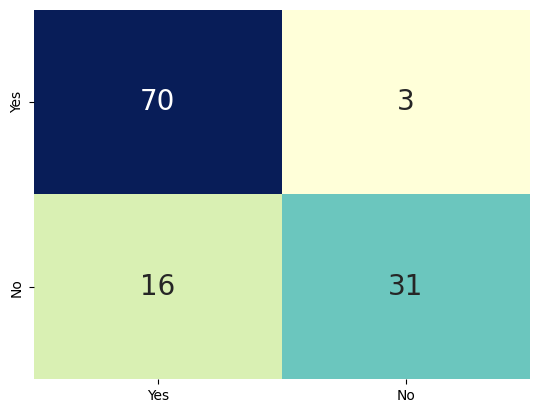

In [ ]:
model = MLPClassifier(hidden_layer_sizes=max(accuracy_scores_identity)[1],
                                  activation='identity',
                                  solver='sgd',  # Use SGD
                                  learning_rate='constant',
                                  learning_rate_init=max(accuracy_scores_identity)[2],
                                  max_iter=200)
model.fit(x_train, y_train)

            # Make predictions on testing set
y_pred = model.predict(x_test)

cr=confusion_matrix(y_test, y_pred)
cr=pd.DataFrame(cr)
cr.columns = ['Yes', 'No']
cr.index=['Yes', 'No']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

In [ ]:
print(y_pred)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 1 0 0 0 0 0]


In [ ]:
accuracy_values=[]
max_dept_values=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for max_dept in max_dept_values:
    # Creating a decision tree classifier with specified max_depth
    clf = DecisionTreeClassifier(max_depth=max_dept,criterion='entropy')

    # Training the classifier on the training set
    clf.fit(x_train, y_train)

    # Making predictions on the testing set
    y_pred = clf.predict(x_test)

    # Calculating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

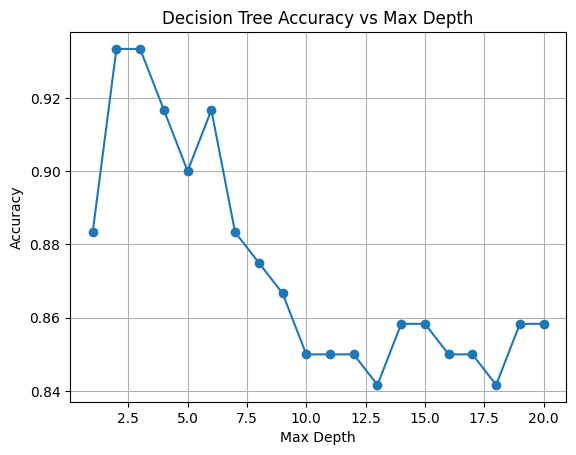

<Axes: >

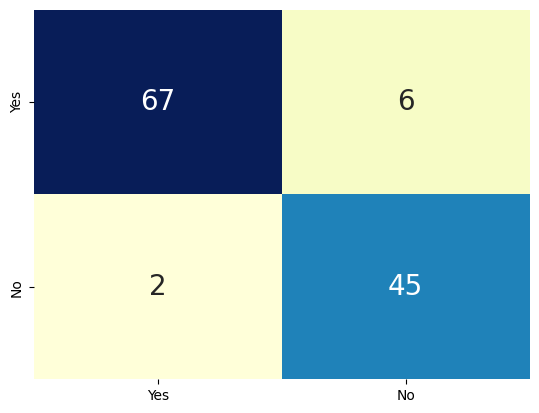

In [ ]:
plt.plot(max_dept_values, accuracy_values, marker='o')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
clf = DecisionTreeClassifier(max_depth=accuracy_values.index(max(accuracy_values))+1,criterion='entropy')

    # Training the classifier on the training set
clf.fit(x_train, y_train)

# Making predictions on the testing set
y_pred = clf.predict(x_test)
cr=confusion_matrix(y_test, y_pred)
cr=pd.DataFrame(cr)
cr.columns = ['Yes', 'No']
cr.index=['Yes', 'No']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

In [ ]:
print(y_pred)

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0
 0 1 1 1 0 0 1 0 0]


SVM


In [ ]:
c_list=[]
c_list.append(0.1)
accuracy_values=[]
svm_model = SVC(C=0.1)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_values.append(accuracy)
for c in np.arange(0.5,1000,0.5):
  svm_model = SVC(C=c)
  svm_model.fit(x_train, y_train)
  y_pred = svm_model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_values.append(accuracy)
  c_list.append(c)

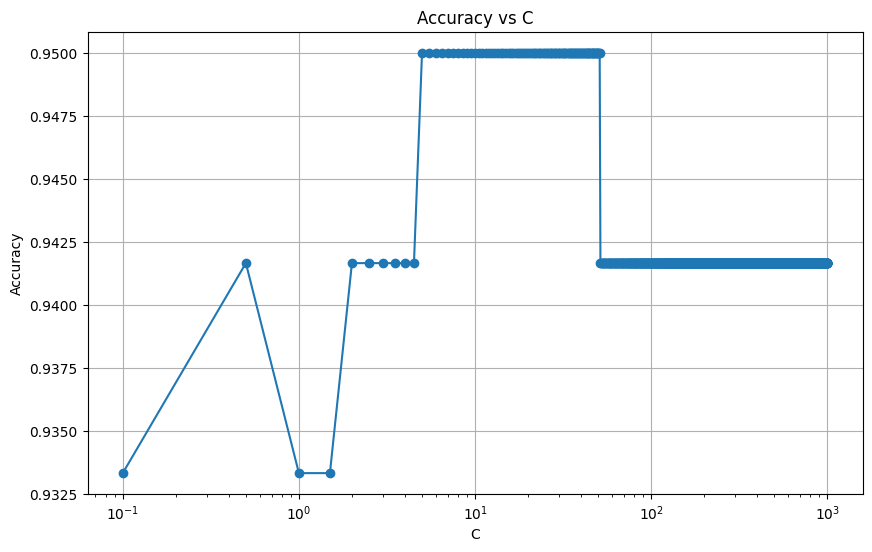

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(c_list, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')  # Using a logarithmic scale for better visualization
plt.grid(True)
plt.show()

In [ ]:
best_c=accuracy_values.index(max(accuracy_values))/2
if (best_c == 0):
  best_c = 0.1
best_c

5.0

<Axes: >

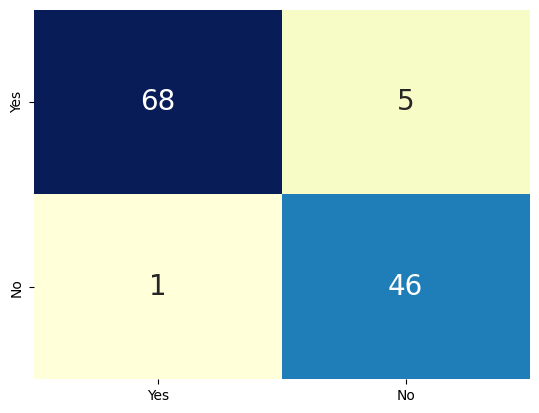

In [ ]:
svm_model = SVC(C=best_c)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
cr=confusion_matrix(y_test, y_pred)
cr=pd.DataFrame(cr)
cr.columns = ['Yes', 'No']
cr.index=['Yes', 'No']
sb.heatmap(cr, annot=True, annot_kws={"size": 20},cbar=0,xticklabels=True,yticklabels=1, fmt="d",cmap='YlGnBu')

In [ ]:
print(y_pred)

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0
 0 1 1 1 0 0 1 0 0]
